# Neighbourhoods in Paris - Capstone Project


# 1 Introduction

## 1.1 Background

Moving to a new multicultural city is a complex process that involves many stressful tasks. One of them is looking for a new place where to live. On top of the challenge of finding a new place to call home, it is very important to find the neighbourhood that matches its own life-style and that has the type facilities that matter the most. People that have lived in multicultural cities know how much each neighbourhood different from another. 

## 1.2 Problem

When moving to a new city it is not obvious to have a clear picture of each neighbourhood and to have the time to explore them before renting a new place. Finding the best-fit neighbourhood in a new city became sometimes more challenging than finds the perfect house. This task is also challenging for the rental agency, which lacks the information that matters to suggest to a new tenant a neighbourhood based on his life-style and preferences.
For this study, I will focus on the city of Paris. I would like to better understand and categorise the 20 arrondissements (neighbourhoods) of Paris based on the venues present in each of them. 

## 1.3 Interest

This analysis will help people moving to Paris to find the best neighbourhood to live based on their lifestyle. This analysis will also help the rental agencies to understand better the main characterises of each neighbourhood and how it could suits each different life-style. 
The rental agency would find beneficial to have an accurate analysis of each area as this will increase to chance to find the perfect neighbourhood for a new tenant as this will increase the lasting time of a tenant in a property and customer satisfaction. The new mover will find beneficial to have a quick analysis of each arrondissement, in order to find quicker the areas that most suit them.
The goal of this project is to analysis and describe each arrondissement, cluster arrondissements that are similar by venues type, and associate each area/cluster with a certain lifestyle (eg. Family, People that love going out, quiet area, residential area) in order to help new tenants to find the perfect neighbourhood in Paris.

# Data Used

I will use the neighbourhood's data in the city of Paris taken from wikipedia. 
I will explore and cluster them based on the type of venues present in each area. I will find the most popular venues from Foursquare API.

- Arrondissement data from Wikipedia [https://en.wikipedia.org/wiki/Arrondissements_of_Paris]
- Foursquare API, to get the most common venues for each arrondissement of Paris.

# 2.0 Analysis

### Library Import

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
#This packagae need to be installed in order to read the html
!pip install lxml
!pip install html5lib
!pip3 install lxml
import lxml

#Install and import BeautifulSoup
!pip install bs4
from bs4 import BeautifulSoup

## 2.1 Data Import

In [77]:
#Scraping the data to pandas data frame
import requests
df = pd.read_csv('arrondissements_paris.csv')
df.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geom
0,750000011,11,75111,11ème Ardt,Popincourt,750001537,3.665442e+06,8282.011886,"48.8590592213,2.3800583082","{""type"": ""Polygon"", ""coordinates"": [[[2.396236..."
1,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"48.86287238,2.3600009859","{""type"": ""Polygon"", ""coordinates"": [[[2.363828..."
2,750000007,7,75107,7ème Ardt,Palais-Bourbon,750001537,4.090057e+06,8099.424883,"48.8561744288,2.31218769148","{""type"": ""Polygon"", ""coordinates"": [[[2.320902..."
3,750000005,5,75105,5ème Ardt,Panthéon,750001537,2.539375e+06,6239.195396,"48.8444431505,2.35071460958","{""type"": ""Polygon"", ""coordinates"": [[[2.364433..."
4,750000008,8,75108,8ème Ardt,Élysée,750001537,3.880036e+06,7880.533268,"48.8727208374,2.3125540224","{""type"": ""Polygon"", ""coordinates"": [[[2.325836..."


## 2.2 Data Cleaning 

In [78]:
df.drop(columns=['n_sq_co','perimetre','geom','surface'], inplace=True)

In [79]:
df.head(10)

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,geom_x_y
0,750000011,11,75111,11ème Ardt,Popincourt,"48.8590592213,2.3800583082"
1,750000003,3,75103,3ème Ardt,Temple,"48.86287238,2.3600009859"
2,750000007,7,75107,7ème Ardt,Palais-Bourbon,"48.8561744288,2.31218769148"
3,750000005,5,75105,5ème Ardt,Panthéon,"48.8444431505,2.35071460958"
4,750000008,8,75108,8ème Ardt,Élysée,"48.8727208374,2.3125540224"
5,750000017,17,75117,17ème Ardt,Batignolles-Monceau,"48.887326522,2.30677699057"
6,750000020,20,75120,20ème Ardt,Ménilmontant,"48.8634605789,2.40118812928"
7,750000001,1,75101,1er Ardt,Louvre,"48.8625627018,2.33644336205"
8,750000002,2,75102,2ème Ardt,Bourse,"48.8682792225,2.34280254689"
9,750000019,19,75119,19ème Ardt,Buttes-Chaumont,"48.8870759966,2.38482096015"


In [41]:
#Check the type of each column
df.dtypes

n_sq_ar       int64
c_ar          int64
c_arinsee     int64
l_ar         object
l_aroff      object
geom_x_y     object
dtype: object

In [80]:
#Add the correct postcode
df['c_arinsee']=df['c_arinsee']-100
df.head(10)

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,geom_x_y
0,750000011,11,75011,11ème Ardt,Popincourt,"48.8590592213,2.3800583082"
1,750000003,3,75003,3ème Ardt,Temple,"48.86287238,2.3600009859"
2,750000007,7,75007,7ème Ardt,Palais-Bourbon,"48.8561744288,2.31218769148"
3,750000005,5,75005,5ème Ardt,Panthéon,"48.8444431505,2.35071460958"
4,750000008,8,75008,8ème Ardt,Élysée,"48.8727208374,2.3125540224"
5,750000017,17,75017,17ème Ardt,Batignolles-Monceau,"48.887326522,2.30677699057"
6,750000020,20,75020,20ème Ardt,Ménilmontant,"48.8634605789,2.40118812928"
7,750000001,1,75001,1er Ardt,Louvre,"48.8625627018,2.33644336205"
8,750000002,2,75002,2ème Ardt,Bourse,"48.8682792225,2.34280254689"
9,750000019,19,75019,19ème Ardt,Buttes-Chaumont,"48.8870759966,2.38482096015"


In [81]:
#Order by Arrondissment 
df=df.sort_values(by=['c_arinsee'])
df.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,geom_x_y
7,750000001,1,75001,1er Ardt,Louvre,"48.8625627018,2.33644336205"
8,750000002,2,75002,2ème Ardt,Bourse,"48.8682792225,2.34280254689"
1,750000003,3,75003,3ème Ardt,Temple,"48.86287238,2.3600009859"
14,750000004,4,75004,4ème Ardt,Hôtel-de-Ville,"48.8543414263,2.35762962032"
3,750000005,5,75005,5ème Ardt,Panthéon,"48.8444431505,2.35071460958"


In [82]:
df2=df.reset_index(drop= True)
df2.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,geom_x_y
0,750000001,1,75001,1er Ardt,Louvre,"48.8625627018,2.33644336205"
1,750000002,2,75002,2ème Ardt,Bourse,"48.8682792225,2.34280254689"
2,750000003,3,75003,3ème Ardt,Temple,"48.86287238,2.3600009859"
3,750000004,4,75004,4ème Ardt,Hôtel-de-Ville,"48.8543414263,2.35762962032"
4,750000005,5,75005,5ème Ardt,Panthéon,"48.8444431505,2.35071460958"


In [83]:
df2=df2.drop(columns=['n_sq_ar','c_ar'])
df2.head()

,c_arinsee,l_ar,l_aroff,geom_x_y
0,75001,1er Ardt,Louvre,"48.8625627018,2.33644336205"
1,75002,2ème Ardt,Bourse,"48.8682792225,2.34280254689"
2,75003,3ème Ardt,Temple,"48.86287238,2.3600009859"
3,75004,4ème Ardt,Hôtel-de-Ville,"48.8543414263,2.35762962032"
4,75005,5ème Ardt,Panthéon,"48.8444431505,2.35071460958"


In [102]:
#Rename the columns 
df3= df2.rename(columns={'c_arinsee': 'Postal Code', 'l_ar': 'Arr', 'l_aroff': 'Name', 'geom_x_y': 'Coordinate'})
df3.head()

,Postal Code,Arr,Name,Coordinate
0,75001,1er Ardt,Louvre,"48.8625627018,2.33644336205"
1,75002,2ème Ardt,Bourse,"48.8682792225,2.34280254689"
2,75003,3ème Ardt,Temple,"48.86287238,2.3600009859"
3,75004,4ème Ardt,Hôtel-de-Ville,"48.8543414263,2.35762962032"
4,75005,5ème Ardt,Panthéon,"48.8444431505,2.35071460958"


In [103]:
#Change Arr column to just report the arrondissement number
df4= df3
df4['Arr']=df4['Postal Code']-75000
df5=df4
df4.head()

,Postal Code,Arr,Name,Coordinate
0,75001,1,Louvre,"48.8625627018,2.33644336205"
1,75002,2,Bourse,"48.8682792225,2.34280254689"
2,75003,3,Temple,"48.86287238,2.3600009859"
3,75004,4,Hôtel-de-Ville,"48.8543414263,2.35762962032"
4,75005,5,Panthéon,"48.8444431505,2.35071460958"


In [111]:
#Creating new dataframe with separate latitude and longitude
Coordinates=df5["Coordinate"].str.split(",", n = 1, expand = True) 
Coordinates

#Creating a new column in the old dataframe with the new column latitude and Longitude
df5['Latitude']=Coordinates[0]
df5['Longitude']=Coordinates[1]
df5.head()


,Postal Code,Arr,Name,Coordinate,Latitude,Longitude
0,75001,1,Louvre,"48.8625627018,2.33644336205",48.8625627018,2.33644336205
1,75002,2,Bourse,"48.8682792225,2.34280254689",48.8682792225,2.34280254689
2,75003,3,Temple,"48.86287238,2.3600009859",48.86287238,2.3600009859
3,75004,4,Hôtel-de-Ville,"48.8543414263,2.35762962032",48.8543414263,2.35762962032
4,75005,5,Panthéon,"48.8444431505,2.35071460958",48.8444431505,2.35071460958


In [113]:
# Dropping old Name columns 
df6=df5.drop(columns =["Coordinate"])
df6.head()

,Postal Code,Arr,Name,Latitude,Longitude
0,75001,1,Louvre,48.8625627018,2.33644336205
1,75002,2,Bourse,48.8682792225,2.34280254689
2,75003,3,Temple,48.86287238,2.3600009859
3,75004,4,Hôtel-de-Ville,48.8543414263,2.35762962032
4,75005,5,Panthéon,48.8444431505,2.35071460958


In [123]:
#Check the type of each column
df6.dtypes

Postal Code     int64
Arr             int64
Name           object
Latitude       object
Longitude      object
dtype: object

In [125]:
#Convert Latitude and Longitude in Float
df6['Latitude'] = df6['Latitude'].astype(float)
df6['Longitude'] = df6['Longitude'].astype(float)
df6.dtypes

Postal Code      int64
Arr              int64
Name            object
Latitude       float64
Longitude      float64
dtype: object

In [126]:
#Count Arrondissement in Paris
print('Paris has {} Arrondissements.'.format(
        len(df6['Arr'].unique())))
df_cleaned=df6

Paris has 20 Arrondissements.


## 2.3 Geografical Data Visualisation 

### Use geopy library to get the latitude and longitude values of Toronto

In [120]:
address = 'Paris'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


### Create a map of Paris with neighborhoods superimposed on top

In [131]:
# create map of Toronto using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough in zip(df_cleaned['Latitude'], df_cleaned['Longitude'], df_cleaned['Arr']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

## 2.4 Arrondissement Exploration

### Define Foursquare credential 

### 2.4.1 Let's explore the first arrondissement 

In [138]:
df_cleaned.loc[0, 'Name']

'Louvre'

### Let's get the coordinates

In [140]:
Louvre_latitude = df_cleaned.loc[0, 'Latitude'] # neighborhood latitude value
Louvre_longitude = df_cleaned.loc[0, 'Longitude'] # neighborhood longitude value

Arr_name = df_cleaned.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Arr_name, 
                                                               Louvre_latitude, 
                                                               Louvre_longitude))

Latitude and longitude values of Louvre are 48.8625627018, 2.33644336205.


### Let's get the top 100 venues that are in Louvre within a radius of 500 meters.

In [142]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Louvre_latitude, 
    Louvre_longitude, 
    radius, 
    LIMIT)

### Send the GET Request

In [144]:
results = requests.get(url).json()

### We want to analyse the type of venues and we extract the categories from Foursquare

In [145]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### We convert the value in a dataframe

In [146]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Musée du Louvre,Art Museum,48.860847,2.336440
1,Palais Royal,Historic Site,48.863236,2.337127
2,Comédie-Française,Theater,48.863088,2.336612
3,La Clef Louvre Paris,Hotel,48.863977,2.336140
4,Place du Palais Royal,Plaza,48.862523,2.336688


#### How many different venues have we found in this Arrondissement?

In [152]:
#venues returned
print('{} venues were returned by Foursquare in the arrondissement of the Louvre.'.format(nearby_venues.shape[0]))

#unique categories 
print('{} unique categories returned by Foursquare in the arrondissement of the Louvre.'.format(nearby_venues['categories'].nunique()))

98 venues were returned by Foursquare in the arrondissement of the Louvre.
45 unique categories returned by Foursquare in the arrondissement of the Louvre.


In [164]:
nearby_venues.groupby('categories').count().sort_values(by=['name'], ascending=False).reset_index().head(10)

,categories,name,lat,lng
0,French Restaurant,9,9,9
1,Japanese Restaurant,7,7,7
2,Plaza,6,6,6
3,Hotel,6,6,6
4,Coffee Shop,5,5,5
5,Ramen Restaurant,4,4,4
6,Café,4,4,4
7,Italian Restaurant,4,4,4
8,Art Museum,3,3,3
9,Korean Restaurant,3,3,3


### 2.4.2 Let's explore all the other arrondissements

In [168]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Arr', 
                  'Arr Latitude', 
                  'Arr Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Now write the code to run the above function on each arrondissement and create a new dataframe called paris_venus

In [169]:
# type your answer here
paris_venues = getNearbyVenues(names=df_cleaned['Arr'],
                                   latitudes=df_cleaned['Latitude'],
                                   longitudes=df_cleaned['Longitude']
                                  )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [173]:
print(paris_venues.shape)
paris_venues.drop(columns=['Arr Latitude','Arr Longitude'], inplace=True)
paris_venues.head()

(1307, 7)


,Arr,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Musée du Louvre,48.860847,2.336440,Art Museum
1,1,Palais Royal,48.863236,2.337127,Historic Site
2,1,Comédie-Française,48.863088,2.336612,Theater
3,1,La Clef Louvre Paris,48.863977,2.336140,Hotel
4,1,Place du Palais Royal,48.862523,2.336688,Plaza


In [174]:
#Check the unique venues

print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 200 uniques categories.


### How many unique venues for Arrondissement ?

In [192]:
unique_venues=paris_venues.groupby('Arr').count().sort_values(by=['Venue'], ascending=False)
#clean the data for the visualisation
unique_venues.drop(columns=['Venue Latitude','Venue Longitude','Venue Category'], inplace=True)
unique_venues

,Venue
Arr,
9,100
3,100
4,100
2,100
7,100
10,100
1,98
5,88
11,66


### Grafiphic rappresentation of the number of unique venues per Arrondissemt

In [184]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.2


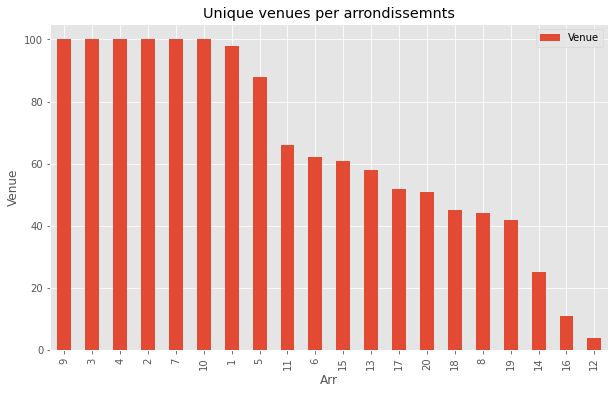

In [193]:
unique_venues.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Arr') # add to x-label to the plot
plt.ylabel('Venue') # add y-label to the plot
plt.title('Unique venues per arrondissemnts') # add title to the plot

plt.show()

### 2.5 Analsyis of all the other arrondissements

In [195]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Arr'] = paris_venues['Arr'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Arr,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Escape Room,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Resort,Restaurant,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Snack Place,Soba Restaurant,South American Restaurant,Southwestern French Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Next, let's group rows by Arrondissement and by taking the mean of the frequency of occurrence of each category

In [198]:
paris_grouped = paris_onehot.groupby('Arr').mean().reset_index()
paris_grouped

,Arr,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,Electronics Store,Escape Room,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Print Shop,Pub,Ramen Restaurant,Resort,Restaurant,Romanian Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Snack Place,Soba Restaurant,South American Restaurant,Southwestern French Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,1,0.000000,0.00,0.00000,0.00,0.00,0.000000,0.030612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.010204,0.000000,0.00,0.020408,0.00,0.000000,0.000000,0.010204,0.020408,0.000000,0.000000,0.000000,0.000000,0.040816,0.000000,0.000000,0.00000,0.010204,0.020408,0.010204,0.000000,0.010204,0.000000,0.000000,0.051020,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.010204,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.020408,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.091837,0.00,0.010204,0.020408,0.000000,0.00,0.010204,0.00,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.020408,0.00,0.000000,0.061224,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.040816,0.071429,0.00,0.000000,0.000000,0.030612,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000

In [201]:
#Check the type of each column
paris_grouped.dtypes
#convert Arr in string 
paris_grouped['Arr'] = paris_grouped['Arr'].astype(str)
paris_grouped.dtypes

Arr                                object
Afghan Restaurant                 float64
African Restaurant                float64
American Restaurant               float64
Antique Shop                      float64
Argentinian Restaurant            float64
Art Gallery                       float64
Art Museum                        float64
Arts & Crafts Store               float64
Asian Restaurant                  float64
Athletics & Sports                float64
BBQ Joint                         float64
Baby Store                        float64
Bagel Shop                        float64
Bakery                            float64
Bar                               float64
Basque Restaurant                 float64
Bed & Breakfast                   float64
Beer Bar                          float64
Beer Garden                       float64
Beer Store                        float64
Belgian Restaurant                float64
Bike Rental / Bike Share          float64
Bistro                            

### Let's print each Arrondissemnt  along with the top 5 most common venues

In [204]:
num_top_venues = 5

for hood in paris_grouped['Arr']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Arr'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----1----
                 venue  freq
0    French Restaurant  0.09
1  Japanese Restaurant  0.07
2                Hotel  0.06
3                Plaza  0.06
4          Coffee Shop  0.05


----2----
                venue  freq
0   French Restaurant  0.11
1            Wine Bar  0.06
2        Cocktail Bar  0.05
3              Bistro  0.04
4  Italian Restaurant  0.04


----3----
               venue  freq
0        Coffee Shop  0.05
1  French Restaurant  0.05
2             Bakery  0.05
3             Bistro  0.04
4       Burger Joint  0.04


----4----
               venue  freq
0  French Restaurant  0.15
1     Ice Cream Shop  0.05
2              Hotel  0.04
3     Clothing Store  0.04
4        Pastry Shop  0.03


----5----
                venue  freq
0   French Restaurant  0.12
1               Hotel  0.06
2      Science Museum  0.06
3  Italian Restaurant  0.06
4                 Bar  0.05


----6----
                venue  freq
0   French Restaurant  0.10
1              Bistro  0.05
2  Italian R

### Convert the previous data into a DataFrame

In [205]:
#Descending the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Dataframe with top 5 venues per arrondissement 

In [208]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Arr']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Arr'] = paris_grouped['Arr']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(10)

,Arr,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,French Restaurant,Japanese Restaurant,Hotel,Plaza,Coffee Shop,Italian Restaurant,Ramen Restaurant,Café,Art Museum,Korean Restaurant
1,2,French Restaurant,Wine Bar,Cocktail Bar,Italian Restaurant,Bistro,Hotel,Salad Place,Bakery,Pizza Place,Furniture / Home Store
2,3,Bakery,French Restaurant,Coffee Shop,Burger Joint,Bistro,Cocktail Bar,Japanese Restaurant,Art Gallery,Café,Clothing Store
3,4,French Restaurant,Ice Cream Shop,Hotel,Clothing Store,Pedestrian Plaza,Italian Restaurant,Cocktail Bar,Pastry Shop,Bistro,Bookstore
4,5,French Restaurant,Science Museum,Hotel,Italian Restaurant,Café,Plaza,Bar,Pub,Coffee Shop,Bakery
5,6,French Restaurant,Bistro,Italian Restaurant,Bakery,Pastry Shop,Wine Bar,Pub,Chocolate Shop,Fountain,Hotel
6,7,Hotel,French Restaurant,Café,Italian Restaurant,Plaza,Cocktail Bar,History Museum,Coffee Shop,Art Museum,Bistro
7,8,French Restaurant,Hotel,Japanese Restaurant,Spa,Cocktail Bar,Art Gallery,Theater,Fast Food Restaurant,Mediterranean Restaurant,Sporting Goods Shop
8,9,French Restaurant,Hotel,Bakery,Bistro,Cocktail Bar,Wine Bar,Lounge,Japanese Restaurant,Pizza Place,Tea Room
9,10,French Restaurant,Hotel,Coffee Shop,Indian Restaurant,Bistro,Café,Italian Restaurant,Pizza Place,Japanese Restaurant,Korean Restaurant


## 3 Clustering

We have some common venue categories in boroughs. In this reason I used unsupervised learning K-means algorithm to cluster the boroughs. K-Means algorithm is one of the most common cluster method of unsupervised learning.

First, I will run K-Means to cluster the boroughs into 3 clusters because when I analyze the K-Means with elbow method it ensured me the 3 degree for optimum k of the K-Means.

### Find the best K with the elbow method

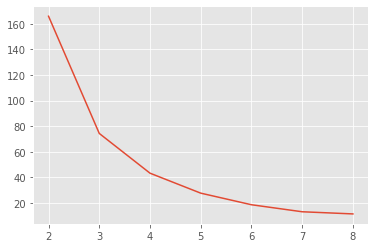

In [276]:
K=[2,3,4,5,6,7,8]
loss=[]
for i in K :
  cl=KMeans(n_clusters=i)
  cl.fit(paris_grouped)
  loss.append(cl.inertia_)
plt.plot(K,loss)
             

In [275]:
### Let's # set number of clusters based on our previous analysis
kclusters = 3

paris_grouped_clustering = paris_grouped.drop('Arr', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] #create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1],
      dtype=int32)

In [236]:
#Check the type of each column
paris_merged.dtypes
paris_merged['Arr'] = paris_merged['Arr'].astype(str)
paris_merged.dtypes


Postal Code                 int64
Arr                        object
Name                       object
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [274]:
#paris_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = df_cleaned

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(paris_venues_sorted.set_index('Arr'), on='Arr')

paris_merged.head(19) # check the last columns!



,Postal Code,Arr,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75001,1,Louvre,48.862563,2.336443,1,French Restaurant,Japanese Restaurant,Hotel,Plaza,Coffee Shop,Italian Restaurant,Ramen Restaurant,Café,Art Museum,Korean Restaurant
1,75002,2,Bourse,48.868279,2.342803,1,French Restaurant,Wine Bar,Cocktail Bar,Italian Restaurant,Bistro,Hotel,Salad Place,Bakery,Pizza Place,Furniture / Home Store
2,75003,3,Temple,48.862872,2.360001,1,Bakery,French Restaurant,Coffee Shop,Burger Joint,Bistro,Cocktail Bar,Japanese Restaurant,Art Gallery,Café,Clothing Store
3,75004,4,Hôtel-de-Ville,48.854341,2.357630,1,French Restaurant,Ice Cream Shop,Hotel,Clothing Store,Pedestrian Plaza,Italian Restaurant,Cocktail Bar,Pastry Shop,Bistro,Bookstore
4,75005,5,Panthéon,48.844443,2.350715,1,French Restaurant,Science Museum,Hotel,Italian Restaurant,Café,Plaza,Bar,Pub,Coffee Shop,Bakery
5,75006,6,Luxembourg,48.849130,2.332898,1,French Restaurant,Bistro,Italian Restaurant,Bakery,Pastry Shop,Wine Bar,Pub,Chocolate Shop,Fountain,Hotel
6,75007,7,Palais-Bourbon,48.856174,2.312188,0,Hotel,French Restaurant,Café,Italian Restaurant,Plaza,Cocktail Bar,History Museum,Coffee Shop,Art Museum,Bistro
7,75008,8,Élysée,48.872721,2.312554,0,French Restaurant,Hotel,Japanese Restaurant,Spa,Cocktail Bar,Art Gallery,Theater,Fast Food Restaurant,Mediterranean Restaurant,Sporting Goods Shop
8,75009,9,Opéra,48.877164,2.337458,1,French Restaurant,Hotel,Bakery,Bistro,Cocktail Bar,Wine Bar,Lounge,Japanese Restaurant,Pizza Place,Tea Room
9,75010,10,Entrepôt,48.876130,2.360728,1,French Restaurant,Hotel,Coffee Shop,Indian Restaurant,Bistro,Café,Italian Restaurant,Pizza Place,Japanese Restaurant,Korean Restaurant


In [263]:
paris_merged.dtypes

Postal Code                 int64
Arr                        object
Name                       object
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

### Visualise the cluster

In [232]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [264]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

paris_merged['Cluster Labels'] =paris_merged['Cluster Labels'].astype(int)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Arr'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



## Analyse the cluster

## Cluster 0

In [286]:
cluster_0=paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster_0

,Arr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,7,0,Hotel,French Restaurant,Café,Italian Restaurant,Plaza,Cocktail Bar,History Museum,Coffee Shop,Art Museum,Bistro
7,8,0,French Restaurant,Hotel,Japanese Restaurant,Spa,Cocktail Bar,Art Gallery,Theater,Fast Food Restaurant,Mediterranean Restaurant,Sporting Goods Shop
13,14,0,French Restaurant,Hotel,Bistro,Food & Drink Shop,Plaza,Fast Food Restaurant,Tea Room,Café,Bakery,Italian Restaurant
16,17,0,Hotel,French Restaurant,Italian Restaurant,Japanese Restaurant,Bakery,Café,Bistro,Plaza,Restaurant,Portuguese Restaurant


In [313]:
#Count the most popular venues in this cluster
cluster_0['1st Most Common Venue'].str.split(expand=True).stack().value_counts()



Restaurant    2
French        2
Hotel         2
dtype: int64

In [318]:
cluster_0['2nd Most Common Venue'].str.split(expand=True).stack().value_counts()

Restaurant    2
French        2
Hotel         2
dtype: int64

## Cluster 1

In [288]:
cluster_1=paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster_1

,Arr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,1,French Restaurant,Japanese Restaurant,Hotel,Plaza,Coffee Shop,Italian Restaurant,Ramen Restaurant,Café,Art Museum,Korean Restaurant
1,2,1,French Restaurant,Wine Bar,Cocktail Bar,Italian Restaurant,Bistro,Hotel,Salad Place,Bakery,Pizza Place,Furniture / Home Store
2,3,1,Bakery,French Restaurant,Coffee Shop,Burger Joint,Bistro,Cocktail Bar,Japanese Restaurant,Art Gallery,Café,Clothing Store
3,4,1,French Restaurant,Ice Cream Shop,Hotel,Clothing Store,Pedestrian Plaza,Italian Restaurant,Cocktail Bar,Pastry Shop,Bistro,Bookstore
4,5,1,French Restaurant,Science Museum,Hotel,Italian Restaurant,Café,Plaza,Bar,Pub,Coffee Shop,Bakery
5,6,1,French Restaurant,Bistro,Italian Restaurant,Bakery,Pastry Shop,Wine Bar,Pub,Chocolate Shop,Fountain,Hotel
8,9,1,French Restaurant,Hotel,Bakery,Bistro,Cocktail Bar,Wine Bar,Lounge,Japanese Restaurant,Pizza Place,Tea Room
9,10,1,French Restaurant,Hotel,Coffee Shop,Indian Restaurant,Bistro,Café,Italian Restaurant,Pizza Place,Japanese Restaurant,Korean Restaurant
10,11,1,French Restaurant,Supermarket,Café,Restaurant,Bakery,Pastry Shop,Theater,Cocktail Bar,Pizza Place,Italian Restaurant
12,13,1,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,French Restaurant,Juice Bar,Convenience Store,Bus Stop,Butcher,Sandwich Place


In [314]:
cluster_1['1st Most Common Venue'].str.split(expand=True).stack().value_counts()

Restaurant    10
French         9
Bakery         2
Vietnamese     1
Plaza          1
Hotel          1
Bar            1
dtype: int64

In [316]:
cluster_1['2nd Most Common Venue'].str.split(expand=True).stack().value_counts()

Restaurant     6
French         3
Hotel          2
Bar            2
Japanese       1
Museum         1
Supermarket    1
Italian        1
Ice            1
Shop           1
Bistro         1
Wine           1
Asian          1
Lake           1
Cream          1
Science        1
dtype: int64

## Cluster 2

In [289]:
cluster_2=paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster_2

,Arr,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,12,2,Zoo Exhibit,Supermarket,Monument / Landmark,Zoo,Antique Shop,Concert Hall,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [315]:
cluster_2['1st Most Common Venue'].str.split(expand=True).stack().value_counts()

Exhibit    1
Zoo        1
dtype: int64